In [1]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

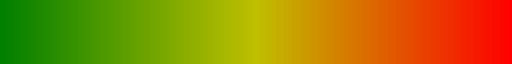

In [2]:
from  matplotlib.colors import LinearSegmentedColormap
gyr_cmap=LinearSegmentedColormap.from_list('rg',["g", "y", "r"], N=256) 
gyr_cmap

In [3]:
input_dir = Path("../output_sweep")

In [4]:
sweep_result = pd.read_csv(input_dir / "result.csv")
sweep_result.columns

Index(['events', 'jobs', 'particles', 'pmin', 'pmax', 'filter_outliers',
       'core_quantile', 'output', 'components', 'weight_cutoff', 'timing',
       'n_tracks', 'n_outliers', 'res_eLOC0_mean', 'res_eLOC0_mean_err',
       'res_eLOC0_rms', 'res_eLOC0_rms_err', 'pull_eLOC0_mean',
       'pull_eLOC0_mean_err', 'pull_eLOC0_std', 'pull_eLOC0_std_err',
       'res_eLOC1_mean', 'res_eLOC1_mean_err', 'res_eLOC1_rms',
       'res_eLOC1_rms_err', 'pull_eLOC1_mean', 'pull_eLOC1_mean_err',
       'pull_eLOC1_std', 'pull_eLOC1_std_err', 'res_ePHI_mean',
       'res_ePHI_mean_err', 'res_ePHI_rms', 'res_ePHI_rms_err',
       'pull_ePHI_mean', 'pull_ePHI_mean_err', 'pull_ePHI_std',
       'pull_ePHI_std_err', 'res_eTHETA_mean', 'res_eTHETA_mean_err',
       'res_eTHETA_rms', 'res_eTHETA_rms_err', 'pull_eTHETA_mean',
       'pull_eTHETA_mean_err', 'pull_eTHETA_std', 'pull_eTHETA_std_err',
       'res_eQOP_mean', 'res_eQOP_mean_err', 'res_eQOP_rms',
       'res_eQOP_rms_err', 'pull_eQOP_mean', 'pu

In [5]:
sweep_result["timing_ms"] = 1e3 * sweep_result["timing"]
sweep_result["outlier_ratio"] = sweep_result["n_outliers"] / sweep_result["n_tracks"]

In [6]:
sweep_result[["n_tracks", "n_outliers", "outlier_ratio", "timing_ms","components","weight_cutoff", "res_eQOP_mean", "res_eQOP_rms", "res_eQOP_mean_core", "res_eQOP_rms_core"]]

,n_tracks,n_outliers,outlier_ratio,timing_ms,components,weight_cutoff,res_eQOP_mean,res_eQOP_rms,res_eQOP_mean_core,res_eQOP_rms_core
0,1297,175,0.134927,690.7,4,1.000000e-04,-0.010669,0.595130,-0.001465,0.018282
1,1285,178,0.138521,796.6,4,1.000000e-08,-0.028703,0.286807,-0.001240,0.017729
2,1299,179,0.137798,943.8,8,1.000000e-02,-0.049809,0.360444,-0.003833,0.016007
3,1297,159,0.122591,1329.0,8,1.000000e-04,-0.014059,0.610017,-0.002145,0.016783
4,1292,162,0.125387,4099.0,16,1.000000e-08,-0.020780,0.664236,-0.001673,0.017239
5,1293,172,0.133024,1713.0,8,1.000000e-08,-0.013434,0.616113,-0.002070,0.018111
6,1295,228,0.176062,216.1,1,1.000000e-02,-0.044315,0.460744,0.000591,0.017311
7,1295,223,0.172201,226.5,1,1.000000e-04,0.023042,1.926534,0.002360,0.019670
8,1295,153,0.118147,2085.0,12,1.000000e-04,-0.026891,0.255380,-0.001618,0.015565
9,1294,154,0.119011,2961.0,16,1.000000e-04,-0.002383,0.762369,-0.001985,0.016839


In [7]:
def plot_for_key(ax, key, formatter, score_fn):
    scores = score_fn(sweep_result[key])
    
    edge_widths = np.zeros(len(scores))
    edge_widths[np.argmin(scores)] = 5.
    
    ax.scatter(sweep_result["components"], sweep_result["weight_cutoff"], s=3000, c=scores, cmap=gyr_cmap, linewidths=edge_widths, edgecolors='black')
    
    keys = ["components","weight_cutoff",key]
    if key + "_err" in sweep_result:
        keys.append(key + "_err")
    
    for row in sweep_result[keys].to_numpy():
        text = formatter(row[2])
        if len(row) == 4:
            text += "\n+-" + formatter(row[3])
        ax.text(row[0], row[1], text, fontdict={"size": 12}, horizontalalignment='center', verticalalignment='center')
        
    ax.set_yscale('log')
    ax.set_xlabel("components")
    ax.set_ylabel("weight cutoff")
    
    ax.set_xticks(np.unique(sweep_result["components"]))
    ax.set_yticks(np.unique(sweep_result["weight_cutoff"]))
    ax.set_ylim(ax.get_ylim()[0]/10, ax.get_ylim()[1]*10)
    
    ax.set_title(key, fontweight="bold", fontdict={"size": 16})

In [8]:
def plot_key_selection(key_selection, filename):
    fig, axes = plt.subplots(3,2,figsize=(20,12))

    for ax, key in zip(axes.flatten(), key_selection):
        if key == "timing_ms":
            formatter = "{:.0f}".format
        elif key == "outlier_ratio":
            formatter = "{:.2%}".format
        else:
            formatter = "{:.3f}".format

        if "pull_eQOP_std" in key:
            score_fn = lambda x: abs(1.0 - x)
        else:
            score_fn = lambda x: abs(x)

        plot_for_key(ax, key, formatter,  score_fn)

    fig.tight_layout()
    fig.savefig(input_dir / filename)

In [9]:
key_selection = ["res_eQOP_mean", "res_eQOP_rms", "pull_eQOP_mean","pull_eQOP_std", "timing_ms", "outlier_ratio"]
key_selection_core = [ key + "_core" if "eQOP" in key else key for key in key_selection ]

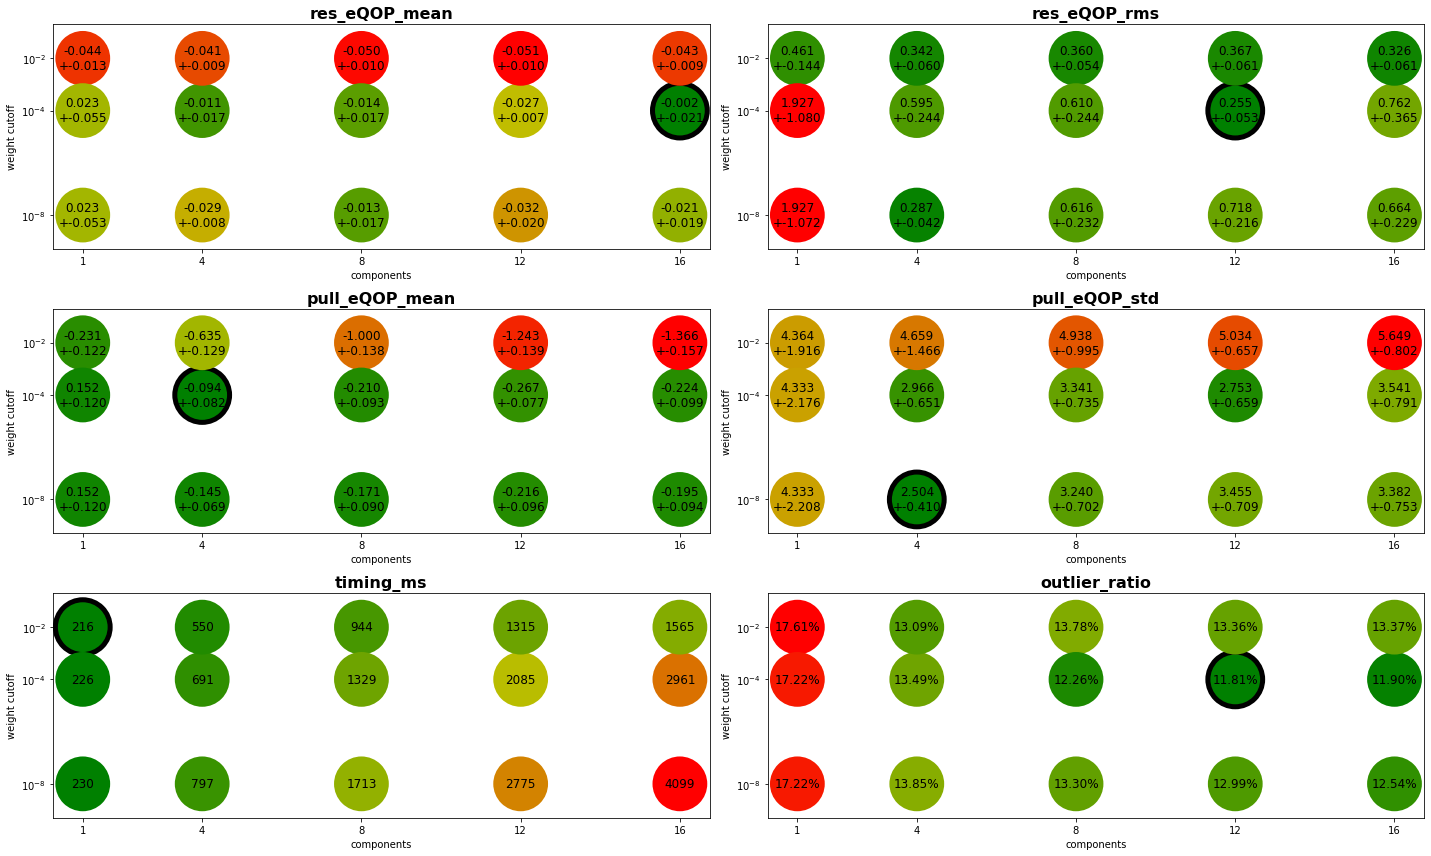

In [10]:
plot_key_selection(key_selection, "summary.png")

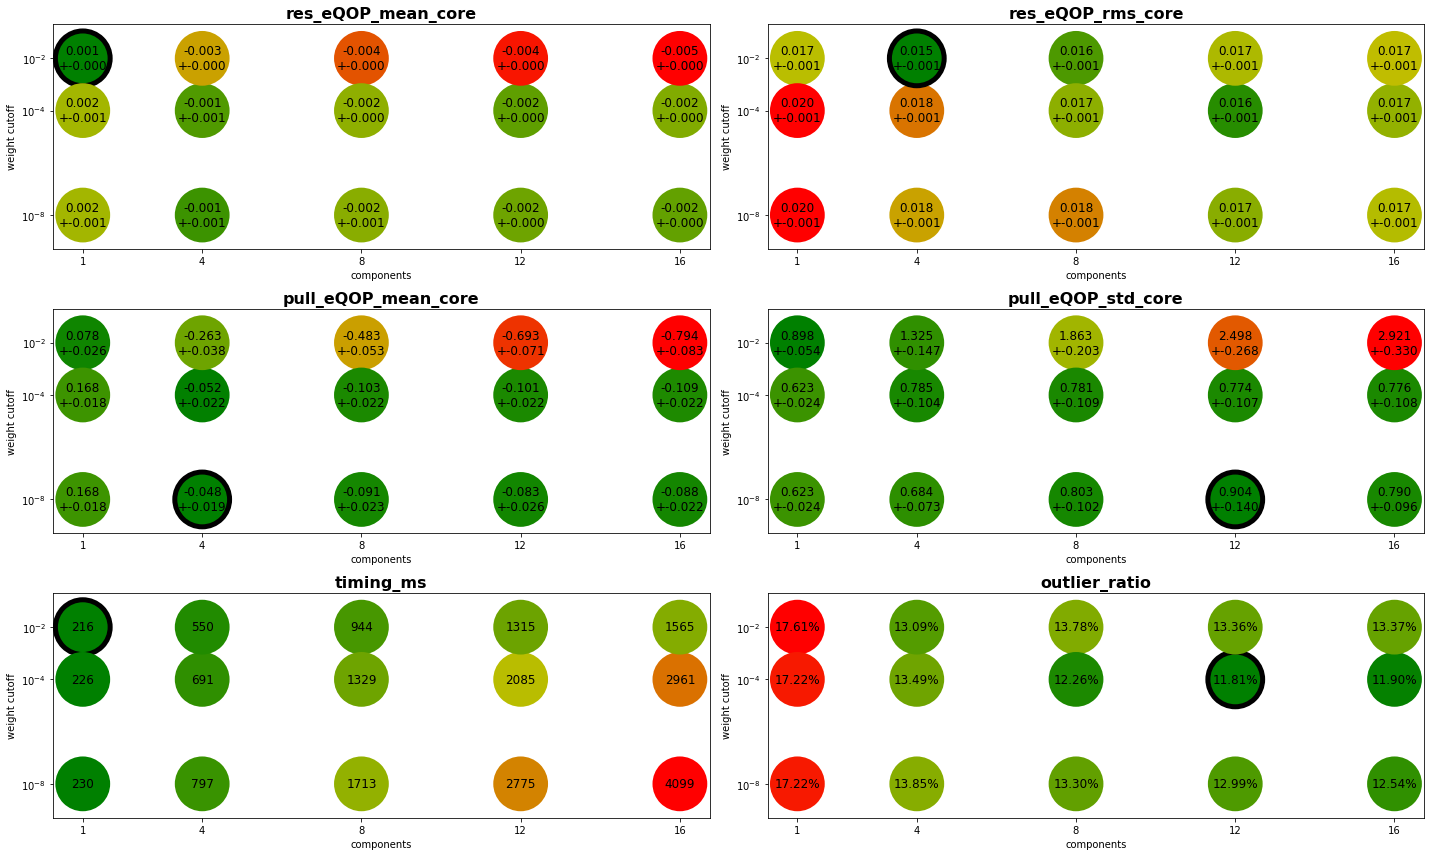

In [11]:
plot_key_selection(key_selection_core, "summary_core.png")

In [12]:
from gsfanalysis.parallel_coordinates import parallel_coordinates

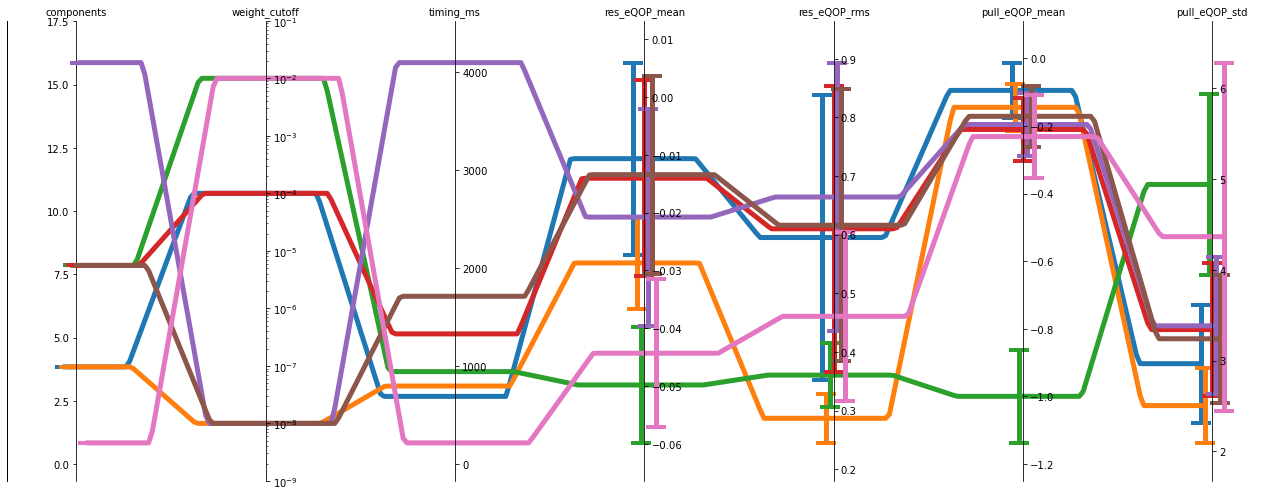

In [13]:
fig, ax = parallel_coordinates(
    sweep_result.loc[:6, ["components","weight_cutoff","timing_ms","res_eQOP_mean", "res_eQOP_rms","pull_eQOP_mean", "pull_eQOP_std"]],
    sweep_result.loc[:6, ["res_eQOP_mean_err", "res_eQOP_rms_err", "pull_eQOP_mean_err", "pull_eQOP_std_err"]],
    "_err",
    jitter_x=True,
    log_columns=["weight_cutoff"],
    lw=5
)

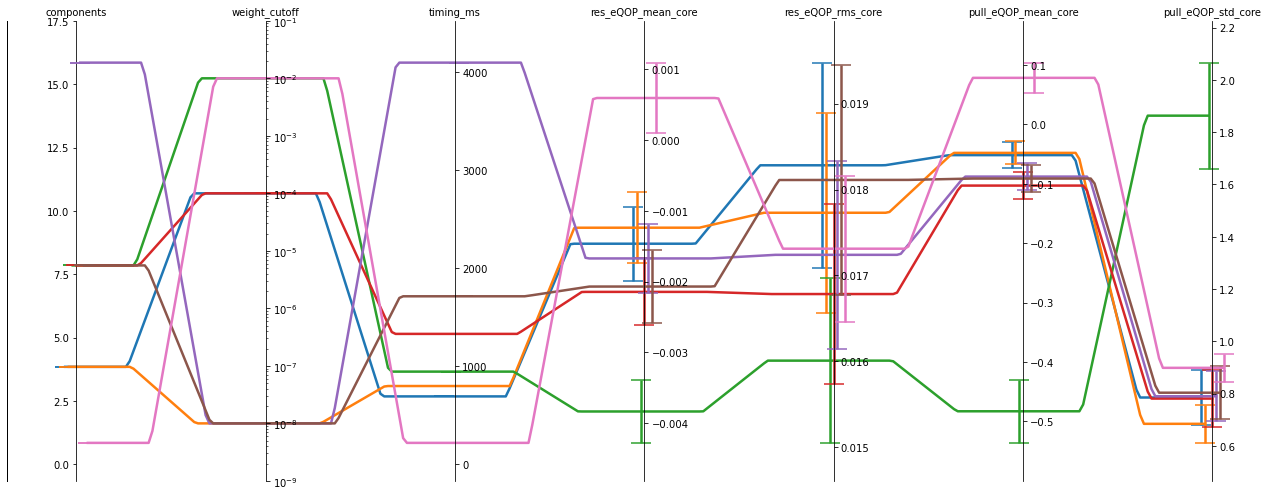

In [14]:
fig, ax = parallel_coordinates(
    sweep_result.loc[:6, ["components","weight_cutoff","timing_ms","res_eQOP_mean_core", "res_eQOP_rms_core","pull_eQOP_mean_core", "pull_eQOP_std_core"]],
    sweep_result.loc[:6, ["res_eQOP_mean_core_err", "res_eQOP_rms_core_err", "pull_eQOP_mean_core_err", "pull_eQOP_std_core_err"]],
    "_err",
    jitter_x=True,
    log_columns=["weight_cutoff"],
    lw=2.5
)